<a href="https://colab.research.google.com/github/Rifat094/notebooks/blob/main/Russian_Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Russian Real Estate Price Prediction



![](https://www.durhamradionews.com/wp-content/uploads/HOUSE-FOR-SALE-1.jpg)

I am assigned with a new problem.
> The given task is to predict the sale price of a Real Estate based on it's different features.

I am asked to predict the price_doc of the Real Estate based on the I am given.

I will be following the listed steps below to get to my solution:-

1.   Download the dataset and analyse it.
2.   Explore and visualize the data.
3.   Cleaning and feature engineering of the data.
4.   Train the First ML model on the dataset.
5.   Tune hyperparameters and regularization.
6.   Doing the 4 and 5 steps for another ML model.
7.   Making predictions and submitting the predictions.
---

8.   Saving the model.
9.  Summary and references.


## Install Important Packages 

I will need some important packages like jovian to save my work, pandas to work with the given data, numpy to do complex calculation efficiently, plotly to plot data in a graph,scikit-learn n xgboost to use machine learning frameworks to train our model easily 

In [161]:
!pip install jovian scikit-learn --upgrade --quiet

In [163]:
import jovian

In [164]:
!pip install numpy pandas xgboost matplotlib seaborn plotly opendatasets jovian --quiet

## Download Data and unzip

The dataset is available as a ZIP file at the following url. Let's put it in a variable named 'dataset_url' n try downloading the data. Later unzip the zip file using zipfile module. 

In [170]:
dataset_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6392/44054/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1672817428&Signature=LqnlCDgYos7vO6Z%2FvDM1F7pNV0sZDq38R2mTFut9zivxidqBvP%2B5MfJdEwefaae%2Fzm9nHycDXTD2rfpKlyQCe2x6U77UzoG9%2BkRS9xFCq6HrydkEUauBVyfTUPaqOOJHH9zNmnsZxmbe5mmSw6OywqVqMPONsJTn5Fn5jk1yuZbozrJ9i3Xq9i4U35Hxru5C4ZObW%2ByYeqUNbZUnyj359iZlPw8XxL9P9G2K%2FGoEaDfbI9i8MRqMnsAw7Nwx9wSTpJe9gV%2FWIkRA5L6QZzfc%2B8DpyD3b%2BK%2FXJbvrCYYMlCFysb%2FvEdOzgi2fzkJml0Ibr%2BV7RczoLfcS5qF0Q2oW6g%3D%3D&response-content-disposition=attachment%3B+filename%3Dsberbank-russian-housing-market.zip'

In [171]:
from urllib.request import urlretrieve

In [172]:
urlretrieve(dataset_url, 'Housing_Market.zip')

('Housing_Market.zip', <http.client.HTTPMessage at 0x7f56775e0be0>)

In [173]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os

In [174]:
with ZipFile('Housing_Market.zip') as f:
    f.extractall(path='Housing_Market')

In [17]:
data_dir = 'Housing_Market'
os.listdir(data_dir)

['train.csv.zip',
 'data_dictionary.txt',
 'sample_submission.csv.zip',
 'test.csv.zip',
 'macro.csv.zip']

We have zip files again. So we have to unzip these zip files to get our data 

In [18]:
with ZipFile('Housing_Market/train.csv.zip') as f:
    f.extractall(path='Housing_Market')

In [19]:
with ZipFile('Housing_Market/test.csv.zip') as f:
    f.extractall(path='Housing_Market')

In [20]:
with ZipFile('Housing_Market/sample_submission.csv.zip') as f:
    f.extractall(path='Housing_Market')

In [21]:
data_dir = 'Housing_Market'

In [22]:
os.listdir(data_dir)

['train.csv.zip',
 'data_dictionary.txt',
 'sample_submission.csv.zip',
 'test.csv.zip',
 'test.csv',
 '__MACOSX',
 'sample_submission.csv',
 'macro.csv.zip',
 'train.csv']

Now we have some csv files which can be used to do the further calculations 

In [23]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'Housing_Market/train.csv'

## Exploratory Data Analysis and Visualization

Loads the data from the file train.csv and test.csv into a Pandas data frames 

In [24]:
Housing_price_df = pd.read_csv("Housing_Market/train.csv")

In [25]:
test_df = pd.read_csv("Housing_Market/test.csv")

In [26]:
Housing_price_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [27]:
test_df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,1,2,1,0,0,10,0,0,0,0
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,636,371,141,26,150,249,2,105,203,13
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,16,7,2,0,5,11,0,2,43,10


Let's explore the columns and data types within the dataset.

In [28]:
Housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: float64(116), int64(159), object(16)
memory usage: 17.0+ MB


We have a complex data entry as 'timestamp'. Let's break it up 3 new data columns

In [30]:
Housing_price_df[["year", "month", "day"]] = Housing_price_df["timestamp"].str.split("-", expand = True).astype(int)

In [31]:
test_df[["year", "month", "day"]] = test_df["timestamp"].str.split("-", expand = True).astype(int)

In [32]:
Housing_price_df = Housing_price_df.drop('timestamp', axis=1)
test_df = test_df.drop('timestamp', axis=1)

In [33]:
Housing_price_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,year,month,day
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13,22,1,0,52,4,5850000,2011,8,20
1,2,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,29,1,10,66,14,6000000,2011,8,23
2,3,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,27,0,4,67,10,5700000,2011,8,27
3,4,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4,4,0,0,26,3,13100000,2011,9,1
4,5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,135,236,2,91,195,14,16331452,2011,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,26,1,2,84,6,7400000,2015,6,30
30467,30470,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,98,182,1,82,171,15,25000000,2015,6,30
30468,30471,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,2,12,0,1,11,1,6970959,2015,6,30
30469,30472,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,6,31,1,4,65,7,13500000,2015,6,30


In [34]:
test_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
0,30474,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,...,0,1,10,1,0,14,1,2015,7,1
1,30475,79.20,NaN,8,17,1,0.0,3,1.0,1.0,...,0,2,11,0,1,12,1,2015,7,1
2,30476,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,...,0,10,21,0,10,71,11,2015,7,1
3,30477,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,...,0,0,10,0,0,2,0,2015,7,1
4,30478,40.00,40.0,17,17,1,0.0,1,1.0,1.0,...,0,2,12,0,1,11,1,2015,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,...,1,8,39,2,3,75,12,2016,5,26
7658,38132,54.09,NaN,14,0,1,NaN,2,0.0,NaN,...,0,0,10,0,0,0,0,2016,5,28
7659,38133,41.08,1.0,12,1,1,1.0,1,1.0,1.0,...,26,150,249,2,105,203,13,2016,5,30
7660,38134,34.80,19.8,8,9,5,1977.0,1,6.4,2.0,...,0,5,11,0,2,43,10,2016,5,30


Let's check how many empty cells in different columns 

In [35]:
Housing_price_df.isna().sum()

id                      0
full_sq                 0
life_sq              6383
floor                 167
max_floor            9572
                     ... 
market_count_5000       0
price_doc               0
year                    0
month                   0
day                     0
Length: 294, dtype: int64

In [36]:
test_df.isna().sum()

id                      0
full_sq                 0
life_sq              1176
floor                   0
max_floor               0
                     ... 
sport_count_5000        0
market_count_5000       0
year                    0
month                   0
day                     0
Length: 293, dtype: int64

In [37]:
null_df = Housing_price_df.isna().sum()

In [38]:
null_df.to_csv('null_values.csv')

In [39]:
missing_counts = Housing_price_df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_avg_price_500                       13281
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_min_price_avg               6524
cafe_avg_price_1000                       6524
cafe_sum_1000_max_price_avg               6524
life_sq                                   6383
build_count_block                         4991
build_count_slag                          4991
build_count_1971-1995                     4991
build_count_1946-1970                     4991
build_count_1921-1945                     4991
build_count_b

In [40]:
missing_counts2 = test_df.isna().sum().sort_values(ascending=False)
missing_counts2[missing_counts2 > 0]

hospital_beds_raion                      3418
cafe_sum_500_min_price_avg               3159
cafe_avg_price_500                       3159
cafe_sum_500_max_price_avg               3159
preschool_quota                          1596
school_quota                             1595
cafe_sum_1000_max_price_avg              1222
cafe_avg_price_1000                      1222
cafe_sum_1000_min_price_avg              1222
build_count_panel                        1218
build_count_block                        1218
build_count_wood                         1218
build_count_frame                        1218
build_count_brick                        1218
build_count_monolith                     1218
build_count_slag                         1218
build_count_foam                         1218
raion_build_count_with_material_info     1218
raion_build_count_with_builddate_info    1218
build_count_before_1920                  1218
build_count_1921-1945                    1218
build_count_1946-1970             

Let's plot the data and visualize some data columns 

## Training and Validation Set

In [41]:
!pip install plotly matplotlib seaborn --quiet

In [42]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Year is a very important data in this analysis lets separate train and validation dataset based on year 

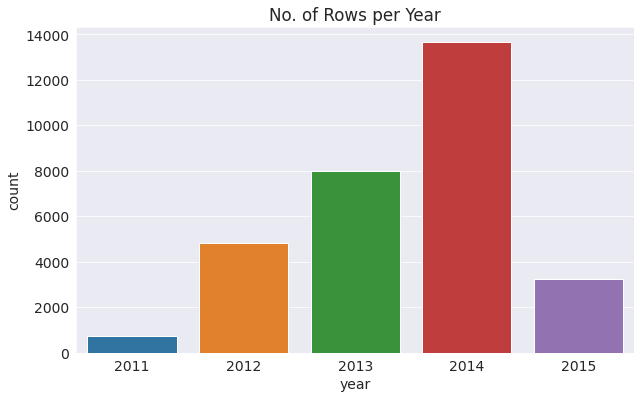

In [44]:
plt.title('No. of Rows per Year')
sns.countplot(x=Housing_price_df.year);

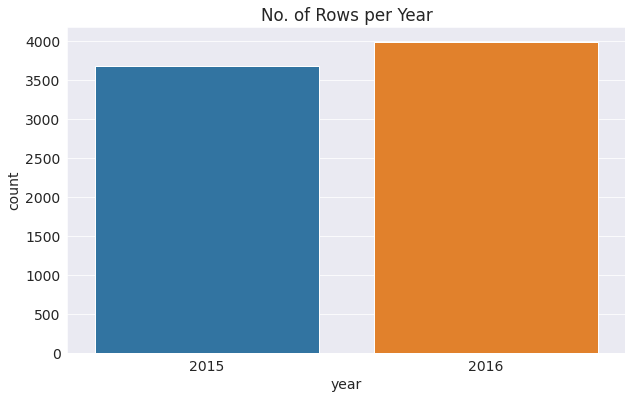

In [45]:
plt.title('No. of Rows per Year')
sns.countplot(x=test_df.year);

In [46]:
Housing_price_df.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
30466    2015
30467    2015
30468    2015
30469    2015
30470    2015
Name: year, Length: 30471, dtype: int64

Let's take the 2011 to 2014 years data as train dataset and 2015 year data as validation dataset

In [47]:
year = Housing_price_df.year

train_df = Housing_price_df[year < 2015]
val_df = Housing_price_df[year == 2015]

In [48]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (27232, 294)
val_df.shape : (3239, 294)


In [49]:
val_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,year,month,day
27232,27235,40,NaN,15.0,22.0,1.0,NaN,1.0,1.0,NaN,...,2,12,0,1,11,1,5813453,2015,1,5
27233,27236,38,NaN,2.0,17.0,1.0,NaN,1.0,1.0,1.0,...,2,12,0,1,10,0,5378825,2015,1,6
27234,27237,102,102.0,24.0,25.0,1.0,0.0,3.0,1.0,1.0,...,1,7,0,0,8,0,8605294,2015,1,10
27235,27238,44,NaN,8.0,0.0,1.0,NaN,1.0,0.0,NaN,...,1,12,1,0,7,0,5723900,2015,1,10
27236,27239,49,29.0,9.0,9.0,2.0,1989.0,2.0,8.0,3.0,...,33,57,1,22,105,5,1020000,2015,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,26,1,2,84,6,7400000,2015,6,30
30467,30470,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,98,182,1,82,171,15,25000000,2015,6,30
30468,30471,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,2,12,0,1,11,1,6970959,2015,6,30
30469,30472,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,6,31,1,4,65,7,13500000,2015,6,30


Let's separate input columns n target column 

In [50]:
input_cols = list(Housing_price_df.columns)[1:-4] + list(Housing_price_df.columns)[-3:]
target_col = 'price_doc'

In [51]:
input_cols

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ek

Let's separate train_inputs,train_targets,val_inputs,val_targets and test_inputs

In [52]:
train_inputs = Housing_price_df[input_cols].copy()
train_targets = Housing_price_df[target_col].copy()

In [53]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [54]:
test_inputs = test_df[input_cols].copy()


let's separate numeric columns and categorical columns to make it easier to fill the empty cells and divide the categorical columns into multiple columns using one hot encoding

In [55]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(exclude=np.number).columns.tolist()

In [56]:
print(numeric_cols)

['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'bu

In [57]:
print(categorical_cols)

['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology']


In [58]:
train_targets

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

## Imputing Missing Numeric Data 

There are so many data missing in different column we have to fill this empty cells otherwise the machine learning won't be able to work properly because of these empty cells. Let's use SimpleImputer from sklearn.impute and fill up the empty cells based up on the mean of the specific column. 

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
imputer = SimpleImputer(strategy = 'mean').fit(Housing_price_df[numeric_cols])

In [61]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [62]:
imputer = SimpleImputer(strategy = 'mean').fit(test_df[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [63]:
train_inputs[numeric_cols].isna().sum()

full_sq              0
life_sq              0
floor                0
max_floor            0
material             0
                    ..
sport_count_5000     0
market_count_5000    0
year                 0
month                0
day                  0
Length: 277, dtype: int64

In [64]:
test_inputs[numeric_cols].isna().sum()

full_sq              0
life_sq              0
floor                0
max_floor            0
material             0
                    ..
sport_count_5000     0
market_count_5000    0
year                 0
month                0
day                  0
Length: 277, dtype: int64

Let's check the description of our dataset now

In [65]:
Housing_price_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,year,month,day
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06,2013.452726,6.749237,16.441830
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06,0.962433,3.518748,8.692743
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,2011.000000,1.000000,1.000000
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06,2013.000000,4.000000,9.000000
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06,2014.000000,6.000000,17.000000
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06,2014.000000,10.000000,24.000000
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08,2015.000000,12.000000,31.000000


In [66]:
test_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723,2015.519838,6.090707,16.039937
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223,0.499639,3.954115,8.606723
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000,2015.000000,2.000000,9.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000,2016.000000,5.000000,16.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000,2016.000000,10.000000,24.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000,2016.000000,12.000000,31.000000


## Scaling Numeric Data

The numeric columns in my datasets have varying ranges. High variation may put large importance for a specific column. We should scale every column in a specific range. Let's use MinMaxScaler from sklearn.preprocessing and scale all numeric data to (0-1) range 

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(Housing_price_df[numeric_cols])

MinMaxScaler()

In [70]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [71]:
train_inputs[numeric_cols]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
0,0.008074,0.003611,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.021207,...,0.000000,0.086093,0.088,0.5,0.000000,0.238532,0.190476,0.0,0.636364,0.633333
1,0.006384,0.002541,0.038961,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.036804,...,0.000000,0.099338,0.116,0.5,0.094340,0.302752,0.666667,0.0,0.636364,0.733333
2,0.008074,0.003878,0.025974,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.013367,...,0.000000,0.072848,0.108,0.0,0.037736,0.307339,0.476190,0.0,0.636364,0.866667
3,0.016710,0.006686,0.116883,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.051482,...,0.033333,0.026490,0.016,0.0,0.000000,0.119266,0.142857,0.0,0.727273,0.000000
4,0.014457,0.010297,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.030966,...,0.566667,0.894040,0.944,1.0,0.858491,0.894495,0.666667,0.0,0.727273,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0.008261,0.003611,0.090909,0.076923,0.000000,0.000098,0.105263,0.002979,0.062500,0.039077,...,0.000000,0.099338,0.104,0.5,0.018868,0.385321,0.285714,1.0,0.454545,0.966667
30467,0.016147,0.007890,0.038961,0.076923,0.200000,0.000096,0.210526,0.004965,0.062500,0.025618,...,0.800000,0.649007,0.728,0.5,0.773585,0.784404,0.714286,1.0,0.454545,0.966667
30468,0.008449,0.004601,0.129870,0.170940,0.000000,0.000153,0.052632,0.000497,0.000000,0.114979,...,0.000000,0.013245,0.048,0.0,0.009434,0.050459,0.047619,1.0,0.454545,0.966667
30469,0.012017,0.004279,0.064935,0.128205,0.000000,0.000100,0.105263,0.005462,0.031250,0.019454,...,0.033333,0.039735,0.124,0.5,0.037736,0.298165,0.333333,1.0,0.454545,0.966667


In [72]:
scaler.fit(test_df[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
test_inputs[numeric_cols]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
0,0.096774,0.023820,0.025,0.187500,0.0,0.989599,0.000000,0.004522,0.666667,0.118013,...,0.000000,0.006667,0.040161,0.5,0.000000,0.066038,0.047619,0.0,0.545455,0.000000
1,0.196526,0.037583,0.175,0.354167,0.0,0.000000,0.111111,0.000508,0.000000,0.114979,...,0.000000,0.013333,0.044177,0.0,0.009524,0.056604,0.047619,0.0,0.545455,0.000000
2,0.100496,0.028884,0.050,0.104167,0.2,0.970778,0.055556,0.002439,0.333333,0.038554,...,0.000000,0.066667,0.084337,0.0,0.095238,0.334906,0.523810,0.0,0.545455,0.000000
3,0.155831,0.041427,0.400,0.354167,0.0,0.998514,0.055556,0.031911,0.666667,0.095164,...,0.000000,0.000000,0.040161,0.0,0.000000,0.009434,0.000000,0.0,0.545455,0.000000
4,0.099256,0.046030,0.400,0.354167,0.0,0.000000,0.000000,0.000508,0.000000,0.114979,...,0.000000,0.013333,0.048193,0.0,0.009524,0.051887,0.047619,0.0,0.545455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0.129529,0.036594,0.225,0.250000,0.8,0.977216,0.055556,0.004624,0.333333,0.028088,...,0.034483,0.053333,0.156627,1.0,0.028571,0.353774,0.571429,1.0,0.363636,0.833333
7658,0.134218,0.037583,0.325,0.000000,0.0,0.901876,0.055556,0.000000,0.328597,0.249589,...,0.000000,0.000000,0.040161,0.0,0.000000,0.000000,0.000000,1.0,0.363636,0.900000
7659,0.101935,0.001151,0.275,0.020833,0.0,0.000495,0.000000,0.000508,0.000000,0.025618,...,0.896552,1.000000,1.000000,1.0,1.000000,0.957547,0.619048,1.0,0.363636,0.966667
7660,0.086352,0.022785,0.175,0.187500,0.8,0.979198,0.000000,0.003252,0.333333,0.024742,...,0.000000,0.033333,0.044177,0.0,0.019048,0.202830,0.476190,1.0,0.363636,0.966667


In [73]:
train_inputs[numeric_cols].describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,0.010179,0.004601,0.099621,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.076354,...,0.059059,0.099639,0.121006,0.221210,0.081593,0.242186,0.285099,0.613181,0.522658,0.514728
std,0.007141,0.006217,0.068901,0.047825,0.245328,0.005728,0.037128,0.011623,0.020491,0.101228,...,0.180627,0.192839,0.189392,0.304634,0.194158,0.212352,0.232820,0.240608,0.319886,0.289758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007135,0.002942,0.038961,0.076923,0.000000,0.000099,0.100516,0.002483,0.031250,0.025618,...,0.000000,0.013245,0.036000,0.000000,0.000000,0.050459,0.047619,0.500000,0.272727,0.266667
50%,0.009200,0.004601,0.090909,0.107342,0.165424,0.000100,0.100516,0.003177,0.034595,0.041308,...,0.000000,0.046358,0.064000,0.000000,0.018868,0.220183,0.238095,0.750000,0.454545,0.533333
75%,0.011829,0.005082,0.142857,0.136752,0.165424,0.000153,0.105263,0.003972,0.034595,0.078214,...,0.033333,0.079470,0.112000,0.500000,0.066038,0.348624,0.476190,0.750000,0.818182,0.766667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
test_inputs[numeric_cols].describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,0.133254,0.037583,0.166314,0.262315,0.170843,0.901876,0.048689,0.003526,0.328597,0.076495,...,0.069222,0.111661,0.132969,0.206212,0.091806,0.265263,0.301463,0.519838,0.462792,0.501331
std,0.049887,0.024074,0.127485,0.138735,0.303434,0.254453,0.046426,0.012998,0.260686,0.108374,...,0.195329,0.204711,0.199739,0.304469,0.204759,0.224682,0.236011,0.499639,0.359465,0.286891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.097270,0.023936,0.075000,0.187500,0.000000,0.970282,0.000000,0.000508,0.000000,0.025618,...,0.000000,0.020000,0.040161,0.000000,0.000000,0.056604,0.095238,0.000000,0.090909,0.266667
50%,0.125087,0.037169,0.150000,0.291667,0.000000,0.978702,0.055556,0.003557,0.333333,0.039077,...,0.000000,0.046667,0.068273,0.000000,0.019048,0.240566,0.238095,1.000000,0.363636,0.500000
75%,0.157072,0.044419,0.250000,0.354167,0.200000,0.994056,0.055556,0.004827,0.666667,0.077456,...,0.034483,0.086667,0.116466,0.500000,0.066667,0.372642,0.523810,1.000000,0.818182,0.766667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.
Let's use OneHotEncoder from sklearn.preprocessing for this 

In [76]:
Housing_price_df[categorical_cols].nunique()

product_type                   2
sub_area                     146
culture_objects_top_25         2
thermal_power_plant_raion      2
incineration_raion             2
oil_chemistry_raion            2
radiation_raion                2
railroad_terminal_raion        2
big_market_raion               2
nuclear_reactor_raion          2
detention_facility_raion       2
water_1line                    2
big_road1_1line                2
railroad_1line                 2
ecology                        5
dtype: int64

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [79]:
encoder.fit(Housing_price_df[categorical_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [80]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['product_type_Investment', 'product_type_OwnerOccupier', 'sub_area_Ajeroport', 'sub_area_Akademicheskoe', 'sub_area_Alekseevskoe', "sub_area_Altuf'evskoe", 'sub_area_Arbat', 'sub_area_Babushkinskoe', 'sub_area_Basmannoe', 'sub_area_Begovoe', 'sub_area_Beskudnikovskoe', 'sub_area_Bibirevo', 'sub_area_Birjulevo Vostochnoe', 'sub_area_Birjulevo Zapadnoe', 'sub_area_Bogorodskoe', 'sub_area_Brateevo', 'sub_area_Butyrskoe', 'sub_area_Caricyno', 'sub_area_Cheremushki', "sub_area_Chertanovo Central'noe", 'sub_area_Chertanovo Juzhnoe', 'sub_area_Chertanovo Severnoe', 'sub_area_Danilovskoe', 'sub_area_Dmitrovskoe', 'sub_area_Donskoe', 'sub_area_Dorogomilovo', 'sub_area_Filevskij Park', 'sub_area_Fili Davydkovo', 'sub_area_Gagarinskoe', "sub_area_Gol'janovo", 'sub_area_Golovinskoe', 'sub_area_Hamovniki', 'sub_area_Horoshevo-Mnevniki', 'sub_area_Horoshevskoe', 'sub_area_Hovrino', 'sub_area_Ivanovskoe', 'sub_area_Izmajlovo', 'sub_area_Jakimanka', 'sub_area_Jaroslavskoe', 'sub_area_Jasenevo', 'sub_

In [81]:
encoder.fit(test_df[categorical_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [82]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [83]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [84]:
train_inputs[encoded_cols]

,product_type_Investment,product_type_OwnerOccupier,sub_area_Ajeroport,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [86]:
X_train

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0.008074,0.003611,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.021207,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.006384,0.002541,0.038961,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.036804,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.008074,0.003878,0.025974,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.013367,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.016710,0.006686,0.116883,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.051482,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.014457,0.010297,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.030966,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0.008261,0.003611,0.090909,0.076923,0.000000,0.000098,0.105263,0.002979,0.062500,0.039077,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
30467,0.016147,0.007890,0.038961,0.076923,0.200000,0.000096,0.210526,0.004965,0.062500,0.025618,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30468,0.008449,0.004601,0.129870,0.170940,0.000000,0.000153,0.052632,0.000497,0.000000,0.114979,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30469,0.012017,0.004279,0.064935,0.128205,0.000000,0.000100,0.105263,0.005462,0.031250,0.019454,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis and Visualization

Let get the full processed dataset in a single data frame and plot some important columns and find the co-relation between different columns 

In [87]:
full_df = X_train.join(train_targets)
full_df 

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,price_doc
0,0.008074,0.003611,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.021207,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5850000
1,0.006384,0.002541,0.038961,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.036804,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6000000
2,0.008074,0.003878,0.025974,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.013367,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5700000
3,0.016710,0.006686,0.116883,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.051482,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13100000
4,0.014457,0.010297,0.051948,0.107342,0.165424,0.000153,0.100516,0.003177,0.034595,0.030966,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0.008261,0.003611,0.090909,0.076923,0.000000,0.000098,0.105263,0.002979,0.062500,0.039077,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7400000
30467,0.016147,0.007890,0.038961,0.076923,0.200000,0.000096,0.210526,0.004965,0.062500,0.025618,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25000000
30468,0.008449,0.004601,0.129870,0.170940,0.000000,0.000153,0.052632,0.000497,0.000000,0.114979,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6970959
30469,0.012017,0.004279,0.064935,0.128205,0.000000,0.000100,0.105263,0.005462,0.031250,0.019454,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13500000


In [88]:
cor_df = full_df .corr()

In [89]:
cor_df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,price_doc
full_sq,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,0.056303,...,-0.042574,0.042574,0.002765,-0.002765,-0.003518,0.004080,0.035676,-0.047674,0.015238,0.341840
life_sq,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,0.043262,...,-0.005510,0.005510,-0.006085,0.006085,-0.009258,-0.006233,0.054810,-0.040249,-0.000918,0.151787
floor,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,-0.019321,...,-0.000474,0.000474,0.002152,-0.002152,-0.010828,0.091705,0.042824,-0.117555,-0.006397,0.117202
max_floor,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,-0.079591,...,0.017181,-0.017181,0.012484,-0.012484,0.015948,0.085377,0.007590,-0.099692,-0.002966,0.080182
material,0.015820,0.010200,-0.007439,0.045915,1.000000,-0.004029,-0.026924,0.038747,-0.031320,0.001012,...,-0.010373,0.010373,-0.001290,0.001290,-0.011404,-0.085474,0.010252,0.069851,0.014982,0.054409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ecology_good,0.004080,-0.006233,0.091705,0.085377,-0.085474,-0.003147,0.021095,-0.000126,0.003988,-0.151193,...,0.017560,-0.017560,0.034967,-0.034967,-0.213784,1.000000,-0.321456,-0.331609,-0.205824,-0.004753
ecology_no data,0.035676,0.054810,0.042824,0.007590,0.010252,-0.002682,-0.062364,-0.023402,-0.245187,0.636453,...,0.074323,-0.074323,0.066112,-0.066112,-0.223170,-0.321456,1.000000,-0.346168,-0.214860,-0.228004
ecology_poor,-0.047674,-0.040249,-0.117555,-0.099692,0.069851,-0.003821,0.014277,0.018660,0.148670,-0.290885,...,-0.072388,0.072388,0.009271,-0.009271,-0.230219,-0.331609,-0.346168,1.000000,-0.221646,0.078130
ecology_satisfactory,0.015238,-0.000918,-0.006397,-0.002966,0.014982,0.015286,0.019863,0.006211,0.082807,-0.099992,...,-0.043024,0.043024,-0.172468,0.172468,-0.142893,-0.205824,-0.214860,-0.221646,1.000000,0.114567


In [90]:
cor_df.price_doc.sort_values(ascending=False).head(20)

price_doc                     1.000000
num_room                      0.404657
full_sq                       0.341840
sport_count_5000              0.294864
sport_count_3000              0.290651
trc_count_5000                0.289371
sport_count_2000              0.278056
office_sqm_5000               0.269977
trc_sqm_5000                  0.268072
sport_count_1500              0.258376
sport_objects_raion           0.252794
trc_count_3000                0.242068
cafe_count_5000_price_1000    0.240464
cafe_count_5000_price_1500    0.232612
cafe_count_5000               0.231546
cafe_count_5000_na_price      0.230055
cafe_count_5000_price_500     0.226952
office_sqm_3000               0.226780
cafe_count_5000_price_2500    0.225566
trc_sqm_3000                  0.225533
Name: price_doc, dtype: float64

In [91]:
cor_df = pd.DataFrame({
    'feature': cor_df.columns,
    'importance': cor_df.price_doc
}).sort_values('importance', ascending=False)

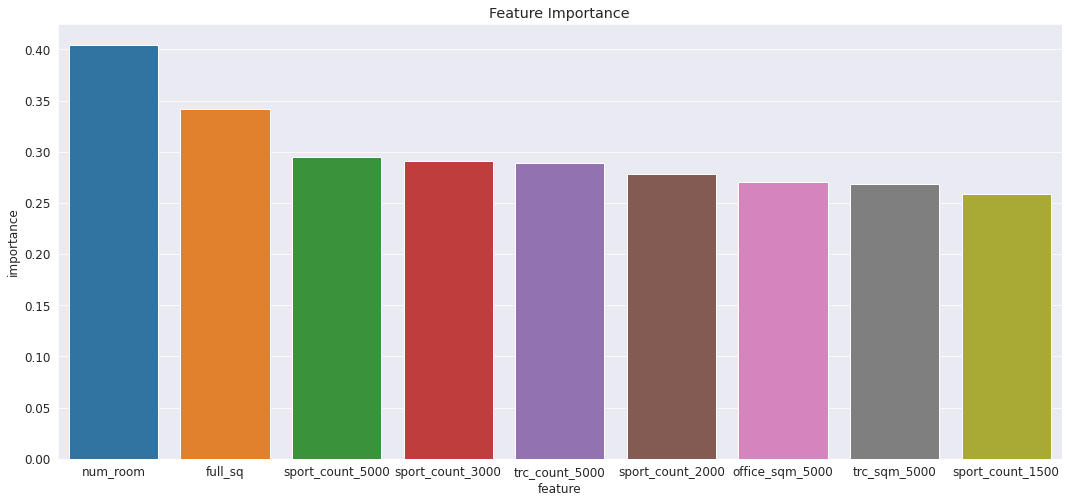

In [92]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (18, 8)
plt.title('Feature Importance')
sns.barplot(data=cor_df.head(20), x=cor_df.feature[1:10], y=cor_df.importance[1:10])

In [93]:
cor_df

,feature,importance
price_doc,price_doc,1.000000
num_room,num_room,0.404657
full_sq,full_sq,0.341840
sport_count_5000,sport_count_5000,0.294864
sport_count_3000,sport_count_3000,0.290651
...,...,...
bulvar_ring_km,bulvar_ring_km,-0.279158
kremlin_km,kremlin_km,-0.279249
sadovoe_km,sadovoe_km,-0.283622
zd_vokzaly_avto_km,zd_vokzaly_avto_km,-0.284069


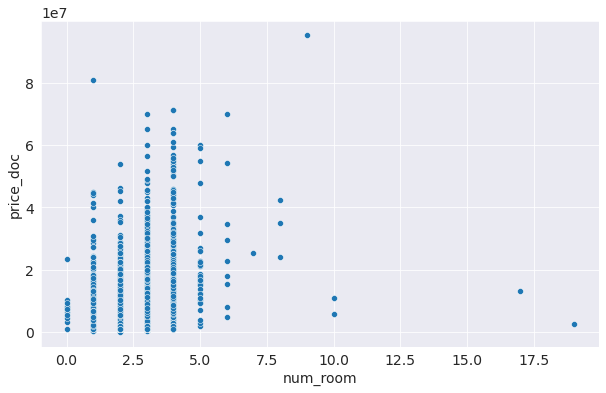

In [94]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(data = Housing_price_df, x ='num_room', y ='price_doc');

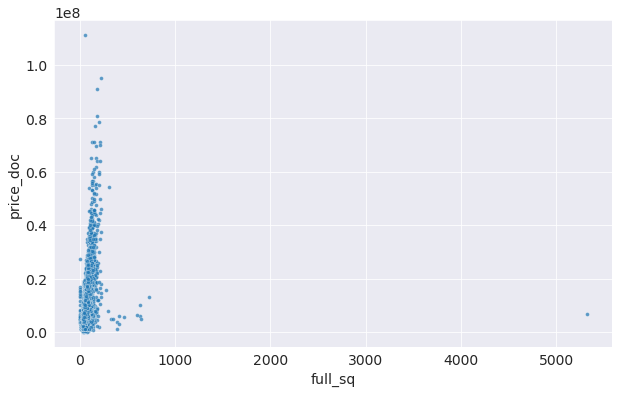

In [95]:
sns.scatterplot(data=Housing_price_df, x='full_sq', y='price_doc', alpha=0.7, s=15);

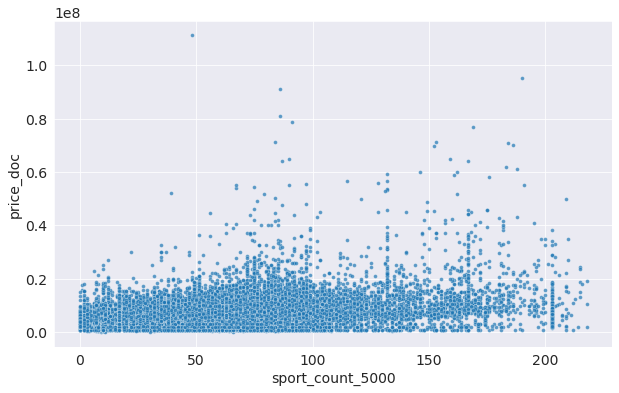

In [96]:
sns.scatterplot(data=Housing_price_df, x='sport_count_5000', y='price_doc', alpha=0.7, s=15);

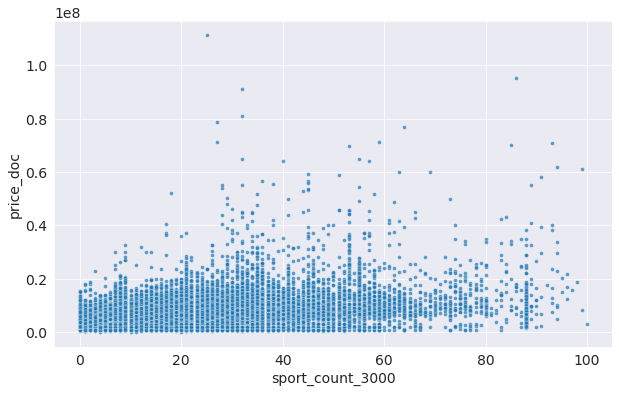

In [97]:
sns.scatterplot(data=Housing_price_df, x='sport_count_3000', y='price_doc', alpha=0.7, s=15);

Let's check out the top important columns

In [98]:
cor_df.feature[1:30]

num_room                                        num_room
full_sq                                          full_sq
sport_count_5000                        sport_count_5000
sport_count_3000                        sport_count_3000
trc_count_5000                            trc_count_5000
sport_count_2000                        sport_count_2000
office_sqm_5000                          office_sqm_5000
trc_sqm_5000                                trc_sqm_5000
sport_count_1500                        sport_count_1500
sport_objects_raion                  sport_objects_raion
trc_count_3000                            trc_count_3000
cafe_count_5000_price_1000    cafe_count_5000_price_1000
cafe_count_5000_price_1500    cafe_count_5000_price_1500
cafe_count_5000                          cafe_count_5000
cafe_count_5000_na_price        cafe_count_5000_na_price
cafe_count_5000_price_500      cafe_count_5000_price_500
office_sqm_3000                          office_sqm_3000
cafe_count_5000_price_2500    c

In [99]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's check out the Scikit-learn algorithm cheat-sheet from their website and see which model would be perfect for my dataset

![](https://scikit-learn.org/stable/_static/ml_map.png)

## Training a Linear Regression Model

According to the cheat-sheet RidgeRegreggion would be perfect for our dataset. Let's use that model and fit the train data first then check the validation data and check how good it's working. 

In [100]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math  
import sklearn.metrics 

In [101]:
def Ridge_test_params(**params):
    model = Ridge(random_state=42, solver='auto', **params).fit(X_train, train_targets)
    train_rmse = mean_squared_error(model.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [102]:
Ridge_test_params(alpha=1.0, max_iter=1000)

(3504004.7424762184, 3738639.153718067)

In [103]:
def Ridge_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = Ridge_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

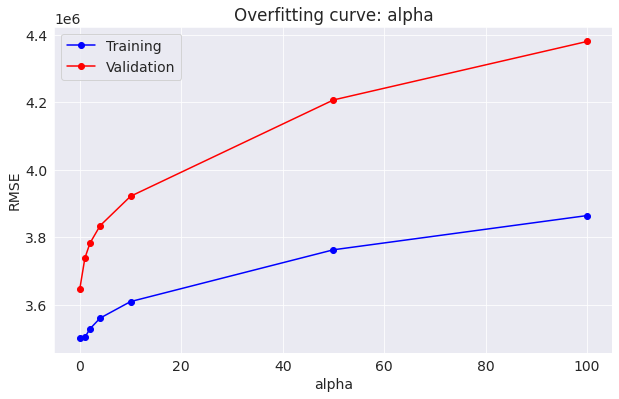

In [104]:
Ridge_test_param_and_plot('alpha', [0, 1, 2, 4, 10, 50, 100])

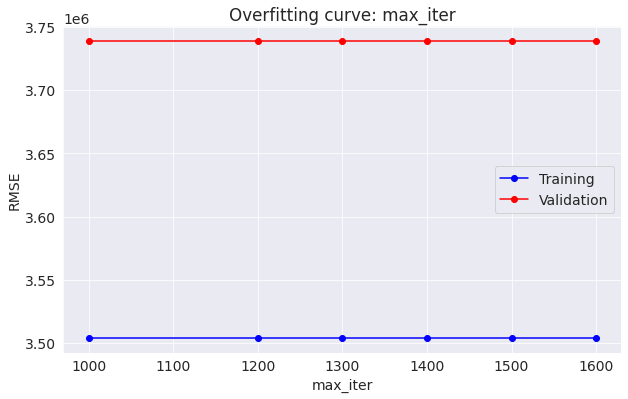

In [105]:
Ridge_test_param_and_plot('max_iter', [1000, 1200, 1300, 1400, 1500, 1600])

In [106]:
model = Ridge(random_state = 42, solver = 'auto', alpha = 0, max_iter = 1500 ).fit(X_train, train_targets)

In [107]:
train_preds = model.predict(X_train)

In [108]:
train_targets

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

In [109]:
train_preds

array([ 4128768.,  5046272.,  5439488., ...,  4849664., 10944512.,
        8978432.])

let's check out the rmse to determine the accuracy of our model

In [110]:
mse = sklearn.metrics.mean_squared_error(train_targets, train_preds)
train_rmse = math.sqrt(mse)  

In [111]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 3502013.4832401597.


In [112]:
val_preds = model.predict(X_val)
val_preds

array([ 5242880.,  3538944., 10485760., ...,  4849664., 10944512.,
        8978432.])

In [113]:
mse = sklearn.metrics.mean_squared_error(val_targets, val_preds)
val_rmse = math.sqrt(mse)  
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 3647513.9249818414.


RMSE is too high. This model is not so good for our model 

In [114]:
test_preds = model.predict(X_test)
test_preds

array([-1.12169142e+18, -1.05578453e+18,  1.22537267e+17, ...,
       -5.40194925e+18, -5.60624524e+17, -1.15144817e+18])

In [115]:
#from sklearn.svm import SVR

In [116]:
#model2 = SVR()
#model2.fit(X_train, train_targets)

In [117]:
#train_preds = model2.predict(X_train)

In [118]:
#train_targets

In [119]:
#train_preds

In [120]:
#mse = sklearn.metrics.mean_squared_error(train_targets, train_preds)
#train_rmse2 = math.sqrt(mse)
#print('The RMSE loss for the training set is $ {}.'.format(train_rmse2))

In [121]:
#val_preds = model.predict(X_val)
#val_preds

In [122]:
#mse = sklearn.metrics.mean_squared_error(val_targets, val_preds)
#val_rmse2 = math.sqrt(mse)  
#print('The RMSE loss for the validation set is $ {}.'.format(val_rmse2))

In [123]:
#from sklearn import linear_model
#model3 = linear_model.Lasso(alpha = 0.5)

In [124]:
#model3.fit(X_train, train_targets)
#train_preds = model3.predict(X_train)
#mse = sklearn.metrics.mean_squared_error(train_targets, train_preds)
#train_rmse2 = math.sqrt(mse)
#print('The RMSE loss for the training set is $ {}.'.format(train_rmse2))

In [125]:
#val_preds = model3.predict(X_val)
#mse = sklearn.metrics.mean_squared_error(val_targets, val_preds)
#val_rmse2 = math.sqrt(mse)  
#print('The RMSE loss for the validation set is $ {}.'.format(val_rmse2))

XGBRegressor can also be used for Regression problems. Let's try that if it's any better 

In [126]:
from xgboost import XGBRegressor

In [127]:
def test_params(**params):
    model2 = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_rmse = mean_squared_error(model2.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model2.predict(X_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [128]:
test_params(n_estimators=20, max_depth=3, learning_rate=0.5)

[07:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2578129.554919653, 2610910.308505579)

In [129]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

[07:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


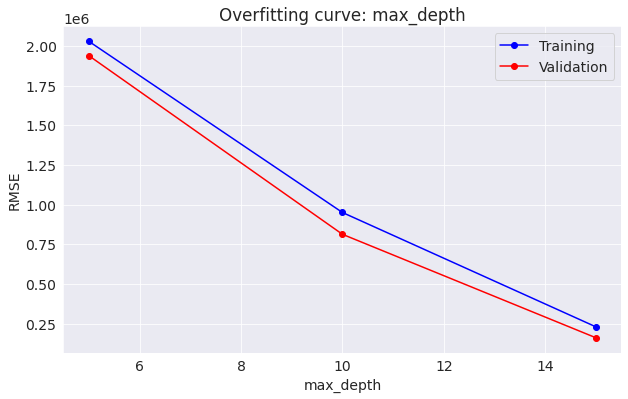

In [130]:
test_param_and_plot('max_depth', [5,10,15])

In [131]:
#test_param_and_plot('min_samples_leaf', [1,2,3,4,5,6,7,8,9,10])

In [132]:
#test_param_and_plot('max_features', [.1,.2,.3,.4,.5,.6,.7,.8,.9])

[07:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


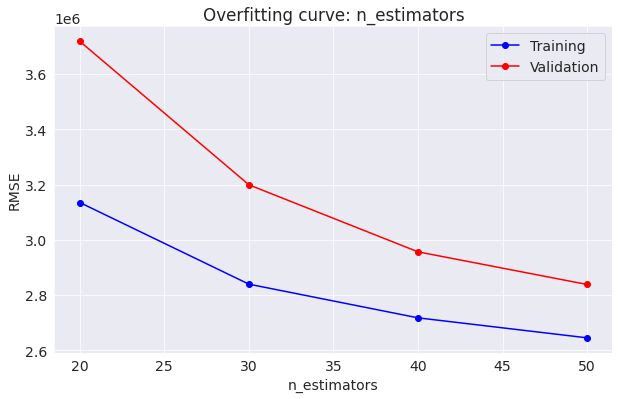

In [133]:
test_param_and_plot('n_estimators', [20,30,40,50])

[07:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


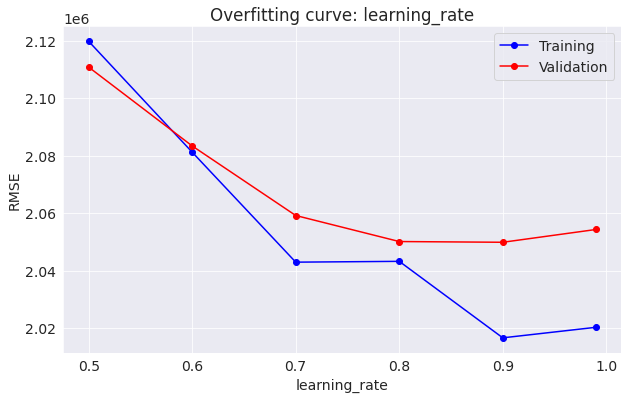

In [134]:
test_param_and_plot('learning_rate', [.5,.6,.7,.8,.9,.99])

In [135]:
model2 = XGBRegressor(n_estimators=50, max_depth=15, learning_rate=.99, n_jobs=-1, random_state=42)

In [136]:
model2.fit(X_train, train_targets)

[07:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.99, max_depth=15, n_estimators=50, n_jobs=-1,
             random_state=42)

In [137]:
train_targets

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

In [138]:
train_preds

array([ 4128768.,  5046272.,  5439488., ...,  4849664., 10944512.,
        8978432.])

In [139]:
train_rmse2 = sklearn.metrics.mean_squared_error(train_targets, train_preds, squared=False)

print('The RMSE loss for the training set is $ {}.'.format(train_rmse2))

The RMSE loss for the training set is $ 3502013.4832401597.


In [140]:
val_preds = model2.predict(X_val)
val_rmse2 = sklearn.metrics.mean_squared_error(val_targets, val_preds, squared=False)
 
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse2))

The RMSE loss for the validation set is $ 12811.627096796614.


We can check out the decision tree n see which are the most important factors in house pricing. Let's sort the importance and the top important features are shown in a data frame. 

In [141]:
trees = model2.get_booster().get_dump()
len(trees)

print(trees[0])

0:[full_sq<0.0171798728] yes=1,no=2,missing=1
	1:[full_sq<0.00985730346] yes=3,no=4,missing=3
		3:[sport_count_3000<0.0549999997] yes=7,no=8,missing=7
			7:[cafe_count_5000<0.00170132332] yes=15,no=16,missing=15
				15:[full_sq<0.00722868927] yes=31,no=32,missing=31
					31:[green_part_1500<0.115473956] yes=63,no=64,missing=63
						63:leaf=866249.625
						64:[green_part_1500<0.693341434] yes=125,no=126,missing=125
							125:[full_sq<0.0056327451] yes=233,no=234,missing=233
								233:leaf=2232616.5
								234:leaf=2818420.75
							126:leaf=2117262.5
					32:[metro_min_avto<0.367126167] yes=65,no=66,missing=65
						65:[market_shop_km<0.0114214551] yes=127,no=128,missing=127
							127:leaf=725999.688
							128:[catering_km<0.0861565024] yes=235,no=236,missing=235
								235:leaf=490049.75
								236:leaf=3560172.25
						66:[indust_part<0.00679368433] yes=129,no=130,missing=129
							129:leaf=494999.75
							130:[market_shop_km<0.108182907] yes=237,no=238,missing=237
							

In [142]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model2.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
242,cafe_count_3000_price_2500,0.272827
265,cafe_count_5000_price_2500,0.191011
267,cafe_count_5000_price_high,0.067786
249,sport_count_3000,0.035975
211,cafe_count_2000,0.033346
175,cafe_count_1000_price_high,0.020758
30,female_f,0.018961
195,cafe_count_1500_price_1500,0.017148
220,cafe_count_2000_price_4000,0.016275
243,cafe_count_3000_price_4000,0.010536


In [143]:
test_preds = model2.predict(X_test)
test_preds

array([ 9536342. , 10259162. ,  7132607.5, ...,  4995550.5,  9520456. ,
        3702749.5], dtype=float32)

In [144]:
test_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day
0,30474,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,...,0,1,10,1,0,14,1,2015,7,1
1,30475,79.20,NaN,8,17,1,0.0,3,1.0,1.0,...,0,2,11,0,1,12,1,2015,7,1
2,30476,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,...,0,10,21,0,10,71,11,2015,7,1
3,30477,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,...,0,0,10,0,0,2,0,2015,7,1
4,30478,40.00,40.0,17,17,1,0.0,1,1.0,1.0,...,0,2,12,0,1,11,1,2015,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,...,1,8,39,2,3,75,12,2016,5,26
7658,38132,54.09,NaN,14,0,1,NaN,2,0.0,NaN,...,0,0,10,0,0,0,0,2016,5,28
7659,38133,41.08,1.0,12,1,1,1.0,1,1.0,1.0,...,26,150,249,2,105,203,13,2016,5,30
7660,38134,34.80,19.8,8,9,5,1977.0,1,6.4,2.0,...,0,5,11,0,2,43,10,2016,5,30


In [145]:
test_df['price_doc'] = test_preds

In [146]:
test_df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,year,month,day,price_doc
0,30474,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,...,1,10,1,0,14,1,2015,7,1,9.536342e+06
1,30475,79.20,NaN,8,17,1,0.0,3,1.0,1.0,...,2,11,0,1,12,1,2015,7,1,1.025916e+07
2,30476,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,...,10,21,0,10,71,11,2015,7,1,7.132608e+06
3,30477,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,...,0,10,0,0,2,0,2015,7,1,1.185915e+07
4,30478,40.00,40.0,17,17,1,0.0,1,1.0,1.0,...,2,12,0,1,11,1,2015,7,1,1.815990e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,...,8,39,2,3,75,12,2016,5,26,1.586835e+07
7658,38132,54.09,NaN,14,0,1,NaN,2,0.0,NaN,...,0,10,0,0,0,0,2016,5,28,1.057534e+07
7659,38133,41.08,1.0,12,1,1,1.0,1,1.0,1.0,...,150,249,2,105,203,13,2016,5,30,4.995550e+06
7660,38134,34.80,19.8,8,9,5,1977.0,1,6.4,2.0,...,5,11,0,2,43,10,2016,5,30,9.520456e+06


In [147]:
submission_df = pd.read_csv("Housing_Market/sample_submission.csv")

In [148]:
submission_df['price_doc'] = test_preds
submission_df.round()

,id,price_doc
0,30474,9536342.0
1,30475,10259162.0
2,30476,7132608.0
3,30477,11859154.0
4,30478,1815990.0
...,...,...
7657,38131,15868348.0
7658,38132,10575340.0
7659,38133,4995550.0
7660,38134,9520456.0


In [149]:
submission_df.to_csv('Housing_Market/sample_submission.csv')

In [150]:
#jovian.commit()

## Saving the model

In [151]:
import joblib

Real_Estate = {
    'model': model2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}

In [152]:
joblib.dump(Real_Estate, 'Real_Estate_infos.joblib')

['Real_Estate_infos.joblib']

In [153]:
jovian.commit(outputs=['Real_Estate_infos.joblib'])

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Summary and References

Let's summarize the work I have done throughout the notebook:-

The following topics were covered in this tutorial:

* Downloading the dataset from Kaggle competition.
* Performing feature engineering and prepare the dataset for training.
* Training and interpreting a Regression model using RidgeRegression.
* Training and interpreting a gradient boosting model using XGBoost.
* Configuring the gradient boosting model and tuning hyperparamters.
* Comparing the both models in terms of RMSE and see which model performs better.
* Predicting on given Testset.
* Saving my model as a .joblib file.

  Below are the sites which I have gone through while working on the project.


    1.scikit-learn library documentation -> https://scikit-learn.org/stable/
    2.XGBoost Documentation -> https://xgboost.readthedocs.io/en/stable/
    3.Stackoverflow -> https://stackoverflow.com/
    4.Pandas library documentation -> https://pandas.pydata.org/docs/
    5.Numpy library documentation -> https://numpy.org/doc/
    6.Matplotlib library documentation -> https://matplotlib.org/stable/index.html
    7.Seaborn library documentation https://seaborn.pydata.org/


In [154]:
jovian.commit(project="russian-real-estate-price-prediction")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
